# Analyze A/B Test Results 

This project will assure you have mastered the subjects covered in the statistics lessons. We have organized the current notebook into the following sections: 

- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)
- [Final Check](#finalcheck)
- [Submission](#submission)

Specific programming tasks are marked with a **ToDo** tag. 

<a id='intro'></a>
## Introduction

A/B tests are very commonly performed by data analysts and data scientists. For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should:
- Implement the new webpage, 
- Keep the old webpage, or 
- Perhaps run the experiment longer to make their decision.

Each **ToDo** task below has an associated quiz present in the classroom.  Though the classroom quizzes are **not necessary** to complete the project, they help ensure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the [rubric](https://review.udacity.com/#!/rubrics/1214/view) specification. 


<a id='probability'></a>
## Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

### 1.1
Now, read in the `ab_data.csv` data. Store it in `df`. Below is the description of the data, there are a total of 5 columns:

<center>

|Data columns|Purpose|Valid values|
| ------------- |:-------------| -----:|
|user_id|Unique ID|Int64 values|
|timestamp|Time stamp when the user visited the webpage|-|
|group|In the current A/B experiment, the users are categorized into two broad groups. <br>The `control` group users are expected to be served with `old_page`; and `treatment` group users are matched with the `new_page`. <br>However, **some inaccurate rows** are present in the initial data, such as a `control` group user is matched with a `new_page`. |`['control', 'treatment']`|
|landing_page|It denotes whether the user visited the old or new webpage.|`['old_page', 'new_page']`|
|converted|It denotes whether the user decided to pay for the company's product. Here, `1` means yes, the user bought the product.|`[0, 1]`|
</center>
Use your dataframe to answer the questions in Quiz 1 of the classroom.


**a.** Read in the dataset from the `ab_data.csv` file and take a look at the top few rows here:

In [2]:
# Reading in dataset ab_data
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


**b.** Use the cell below to find the number of rows in the dataset.

In [3]:
# Finding number of rows and columns
df.shape

(294478, 5)

**c.** The number of unique users in the dataset.

In [4]:
# Counting unique values
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

**d.** The proportion of users converted.

In [5]:
# Finding proportion of converted users
(len(df[df['converted'] == 1])) / df.shape[0]

0.11965919355605512

**e.** The number of times when the "group" is `treatment` but "landing_page" is not a `new_page`.

In [6]:
# Number of treatment group users not using a new page
treatment_groups = df[df['group'] == 'treatment']
len(treatment_groups[treatment_groups['landing_page'] != 'new_page'])

1965

**f.** Do any of the rows have missing values?

In [7]:
# Finding number of null values in each column
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

### 1.2  
In a particular row, the **group** and **landing_page** columns should have either of the following acceptable values:

|user_id| timestamp|group|landing_page|converted|
|---|---|---|---|---|
|XXXX|XXXX|`control`| `old_page`|X |
|XXXX|XXXX|`treatment`|`new_page`|X |


It means, the `control` group users should match with `old_page`; and `treatment` group users should matched with the `new_page`. 

However, for the rows where `treatment` does not match with `new_page` or `control` does not match with `old_page`, we cannot be sure if such rows truly received the new or old wepage.  


Use **Quiz 2** in the classroom to figure out how should we handle the rows where the group and landing_page columns don't match?

**a.** Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
# Remove the inaccurate rows, and store the result in a new dataframe df2
df2 = df.query('group == "control" and landing_page == "old_page"')
df3 = df.query('group == "treatment" and landing_page == "new_page"')
datasets = [df2, df3]
df2 = pd.concat(datasets)

In [9]:
# Double Check all of the incorrect rows were removed from df2 - 
# Output of the statement below should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

### 1.3  
Use **df2** and the cells below to answer questions for **Quiz 3** in the classroom.

**a.** How many unique **user_id**s are in **df2**?

In [10]:
# Finding unique user_id's in df2
df2['user_id'].nunique()

290584

**b.** There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# Finding repeat user_id in df2
df2[df2['user_id'].duplicated(keep='last')]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0


**c.** Display the rows for the duplicate **user_id**? 

In [12]:
# Displaying the duplicates in df2
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**d.** Remove **one** of the rows with a duplicate **user_id**, from the **df2** dataframe.

In [13]:
# Remove one of the rows with a duplicate user_id..
df2.drop(2893, inplace=True)
# Check again if the row with a duplicate user_id is deleted or not
df2[df2['user_id'].duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted


### 1.4  
Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

**a.** What is the probability of an individual converting regardless of the page they receive?<br><br>



In [14]:
# Finding probability of conversions
Ppopulation = df2.shape[0]
num_converted = len(df2[df2['converted'] == 1])
num_converted / Ppopulation

0.11959708724499628

**b.** Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
# Finding the probability of control group conversions
num_converted = len(df2[(df2['converted'] == 1) & (df2['group'] == 'control')])
control_convert = (num_converted / Ppopulation) * 2
control_convert

0.12037139002835669

**c.** Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
# Finding the probability of treatment group conversions
num_converted = len(df2[(df2['converted'] == 1) & (df2['group'] == 'treatment')])
treatment_convert = (num_converted / Ppopulation) * 2
treatment_convert

0.11882278446163588

In [17]:
# Calculate the actual difference (obs_diff) between the conversion rates for the two groups.
obs_diff = treatment_convert - control_convert
obs_diff

-0.0015486055667208037

**d.** What is the probability that an individual received the new page?

In [18]:
# Probability of receiving the new page
num_new_page = len(df2[df2['landing_page'] == 'new_page'])
num_new_page / Ppopulation

0.5000619442226688

**e.** Consider your results from parts (a) through (d) above, and explain below whether the new `treatment` group users lead to more conversions.

>**We can see from the results above that the new treatment group was less likely to lead to more conversions. The probability of the control group to have conversions was about 12.04%, while the probability of the treatment group to have conversions was 11.88%. The difference between these two groups conversion probabilities is about 0.15%.**

<a id='ab_test'></a>
## Part II - A/B Test

Since a timestamp is associated with each event, you could run a hypothesis test continuously as long as you observe the events. 

However, then the hard questions would be: 
- Do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  
- How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


### 2.1
For now, consider you need to make the decision just based on all the data provided.  

If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should be your null and alternative hypotheses (**$H_0$** and **$H_1$**)?  

>**My null hypothesis is that the old page is better than or equal to the new page. <br><br>My alternative hypothesis is that the new page is better than the old page.<br><br>** I will analyze the data with the null hypothesis that either the old page is better than or equal to the new page and try to prove the alternative hypothesis that the new page is better. This alternative hypothesis will be rebuked if the old page is shown to be better with a Type I (false positive) error rate of 5%.

### Null Hypothesis $H_0$ Testing
Under the null hypothesis $H_0$, assume that $p_{new}$ and $p_{old}$ are equal. Furthermore, assume that $p_{new}$ and $p_{old}$ both are equal to the **converted** success rate in the `df2` data regardless of the page. So, our assumption is: <br><br>
<center>
$p_{new}$ = $p_{old}$ = $p_{population}$
</center>

In this section, you will: 

- Simulate (bootstrap) sample data set for both groups, and compute the  "converted" probability $p$ for those samples. 


- Use a sample size for each group equal to the ones in the `df2` data.


- Compute the difference in the "converted" probability for the two samples above. 


- Perform the sampling distribution for the "difference in the converted probability" between the two simulated-samples over 10,000 iterations; and calculate an estimate. 



Use the cells below to provide the necessary parts of this simulation.  You can use **Quiz 5** in the classroom to make sure you are on the right track.

**a.** What is the **conversion rate** for $p_{new}$ under the null hypothesis? 

In [19]:
# Finding conversion rate for new page under null
Pnew = ((df2['converted']).sum()) / Ppopulation
Pnew

0.11959708724499628

**b.** What is the **conversion rate** for $p_{old}$ under the null hypothesis? 

In [20]:
# Finding conversion rate for old page under null
Pold = ((df2['converted']).sum()) / Ppopulation
Pold

0.11959708724499628

**c.** What is $n_{new}$, the number of individuals in the treatment group?

In [21]:
# Finding number of treatment group users with new page
Nnew = len(df2[(df2['group'] == 'treatment') & (df2['landing_page'] == 'new_page')])
Nnew

145310

**d.** What is $n_{old}$, the number of individuals in the control group?

In [22]:
# Finding number of control group users with old page
Nold = len(df2[(df2['group'] == 'control') & (df2['landing_page'] == 'old_page')])
Nold

145274

**e. Simulate Sample for the `treatment` Group**<br> 
Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null hypothesis.


In [23]:
# Simulate a Sample for the treatment Group
new_page_converted = np.random.choice(2, size=Nnew)
new_page_converted

array([0, 0, 0, ..., 1, 0, 1])

**f. Simulate Sample for the `control` Group** <br>
Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null hypothesis. <br> Store these $n_{old}$ 1's and 0's in the `old_page_converted` numpy array.

In [24]:
# Simulate a Sample for the control Group
old_page_converted = np.random.choice([0,1], size=Nnew)
old_page_converted

array([1, 0, 1, ..., 0, 0, 0])

**g.** Find the difference in the "converted" probability $(p{'}_{new}$ - $p{'}_{old})$ for your simulated samples from the parts (e) and (f) above. 

In [25]:
# Finding the difference between new page conversions 
#     and old page conversions
new_page_converted.mean() - old_page_converted.mean()

-0.0016860505126969905


**h. Sampling distribution** <br>
Re-create `new_page_converted` and `old_page_converted` and find the $(p{'}_{new}$ - $p{'}_{old})$ value 10,000 times using the same simulation process you used in parts (a) through (g) above. 

In [78]:
# Sampling distribution 
p_diffs = []
for x in range(10000):
    new_page_converted = np.random.choice([0,1], size=Nnew, p = [1-Pnew, Pnew])
    old_page_converted = np.random.choice([0,1], size=Nold, p = [1-Pold, Pold])
    p_difference = new_page_converted.mean() - old_page_converted.mean()
    p_diffs.append(p_difference)

**i. Histogram**<br> 
Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.<br><br>

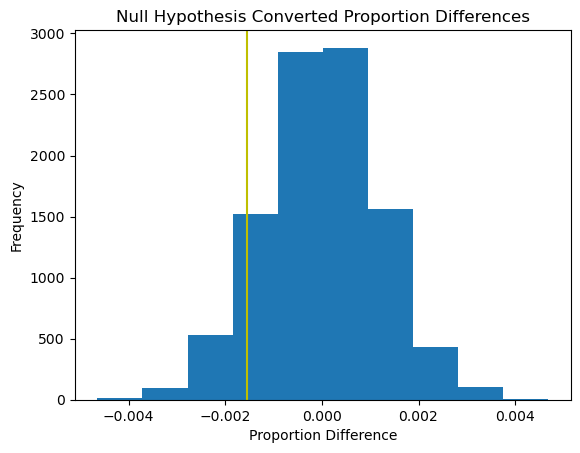

In [79]:
# Plotting a histogram of null hypothesis conversion differences
plt.hist(p_diffs)
plt.axvline(obs_diff, color='y')
plt.xlabel('Proportion Difference')
plt.ylabel('Frequency')
plt.title('Null Hypothesis Converted Proportion Differences');

**j.** What proportion of the **p_diffs** are greater than the actual difference observed in the `df2` data?

In [80]:
# Displaying the average of conversion differences in sample array
#     greater than the actual data conversion differences
(np.array(p_diffs) > obs_diff).mean()

0.9017

**k.** Please explain in words what you have just computed in part **j** above.  
 - What is this value called in scientific studies?  
 - What does this value signify in terms of whether or not there is a difference between the new and old pages?

>**In the sampling array that was created, I determined the total number of proportional differences in the sampling set greater than the number of proportional differences in the original dataset and computed the average. This value is called the p-value. This p-value shows that the difference between the new page and the old page is at a higher rate (0.90) than the Type I error rate of 0.05. This p-value sees to whether the null hypothesis could be true or not and whether the null was created out of the sample distribution. Since the p-value is greater than our Type I error rate, we fail to reject the null hypothesis.**



**l. Using Built-in Methods for Hypothesis Testing**<br>
We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. 


In [29]:
import statsmodels.api as sm

# number of conversions with the old_page
convert_old = len(df2[(df2['landing_page'] == 'old_page') & (df2['converted'] == 1)])

# number of conversions with the new_page
convert_new = len(df2[(df2['landing_page'] == 'new_page') & (df2['converted'] == 1)])

# number of individuals who were shown the old_page
n_old = len(df2[df2['landing_page'] == 'old_page'])

# number of individuals who received new_page
n_new = len(df2[df2['landing_page'] == 'new_page'])

**m.** Now use `sm.stats.proportions_ztest()` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

The syntax is: 
```bash
proportions_ztest(count_array, nobs_array, alternative='larger')
```
where, 
- `count_array` = represents the number of "converted" for each group
- `nobs_array` = represents the total number of observations (rows) in each group
- `alternative` = choose one of the values from `[‘two-sided’, ‘smaller’, ‘larger’]` depending upon two-tailed, left-tailed, or right-tailed respectively. 

---
### About the two-sample z-test
Recall that you have plotted a distribution `p_diffs` representing the
difference in the "converted" probability  $(p{'}_{new}-p{'}_{old})$  for your two simulated samples 10,000 times. 

Another way for comparing the mean of two independent and normal distribution is a **two-sample z-test**. You can perform the Z-test to calculate the Z_score, as shown in the equation below:

$$
Z_{score} = \frac{ (p{'}_{new}-p{'}_{old}) - (p_{new}  -  p_{old})}{ \sqrt{ \frac{\sigma^{2}_{new} }{n_{new}} + \frac{\sigma^{2}_{old} }{n_{old}}  } }
$$

where,
- $p{'}$ is the "converted" success rate in the sample
- $p_{new}$ and $p_{old}$ are the "converted" success rate for the two groups in the population. 
- $\sigma_{new}$ and $\sigma_{new}$ are the standard deviation for the two groups in the population. 
- $n_{new}$ and $n_{old}$ represent the size of the two groups or samples (it's same in our case)


Next step is to make a decision to reject or fail to reject the null hypothesis based on comparing these two values: 
- $Z_{score}$
- $Z_{\alpha}$ or $Z_{0.05}$, also known as critical value at 95% confidence interval.  $Z_{0.05}$ is 1.645 for one-tailed tests,  and 1.960 for two-tailed test. You can determine the $Z_{\alpha}$ from the z-table manually. 

Decide if your hypothesis is either a two-tailed, left-tailed, or right-tailed test. Accordingly, reject OR fail to reject the  null based on the comparison between $Z_{score}$ and $Z_{\alpha}$. We determine whether or not the $Z_{score}$ lies in the "rejection region" in the distribution. In other words, a "rejection region" is an interval where the null hypothesis is rejected iff the $Z_{score}$ lies in that region.


Reference: 
- Example 9.1.2 on this [page](https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Book%3A_Introductory_Statistics_(Shafer_and_Zhang)/09%3A_Two-Sample_Problems/9.01%3A_Comparison_of_Two_Population_Means-_Large_Independent_Samples), courtesy www.stats.libretexts.org

---

In [30]:
# Implementing a z-test on dataset
import statsmodels.api as sm
count_array = np.array([convert_new,convert_old])
nobs_array = np.array([n_new, n_old])
z_score, p_value = sm.stats.proportions_ztest(count_array, nobs_array, alternative='larger')
print(z_score, p_value)

-1.3109241984234394 0.9050583127590245


**n.** What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?<br><br>

>**Based on the Z-test results, the Z-score of -1.31 is not greater than the critical value of 1.65 with a right-tailed test, so we failed to reject the null hypothesis. This means that the old page is more likely to have higher conversion rates compared to the new page. So the old page is shown to be better than the new page as stated in the null hypothesis. These findings agree with the findings in parts j. and k. with our sample testing. The p-value in this z-test is also similar to the p-value from our sampling test, which helps in seeing the similarity between the two tests and their accuracy. Although z-tests are more accurate in terms of using a large dataset.**

<a id='regression'></a>
### Part III - A regression approach

### 3.1 
In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

**a.** Since each row in the `df2` data is either a conversion or no conversion, what type of regression should you be performing in this case?

>**Since df2 data is based on either a conversion or no conversion, the type of regression I will be using in this case is logistic regression. Logistic regression uses categorical responses with only two options, which will be used with this dataset with the options of conversion or no conversion.**

**b.** The goal is to use **statsmodels** library to fit the regression model you specified in part **a.** above to see if there is a significant difference in conversion based on the page-type a customer receives. However, you first need to create the following two columns in the `df2` dataframe:
 1. `intercept` - It should be `1` in the entire column. 
 2. `ab_page` - It's a dummy variable column, having a value `1` when an individual receives the **treatment**, otherwise `0`.  

In [31]:
# Creating a dummy variable and intercept column
df2['intercept'] = 1
df2['ab_page'] = np.where(df2['group'] == 'treatment', 1, 0)

**c.** Use **statsmodels** to instantiate your regression model on the two columns you created in part (b). above, then fit the model to predict whether or not an individual converts. 


In [32]:
# Fitting the model
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


**d.** Provide the summary of your model below, and use it as necessary to answer the following questions.

In [33]:
# Displaying the regression model results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 29 Nov 2022   Pseudo R-squ.:               8.077e-06
Time:                        22:26:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

**e.** What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?

>**The p-value associated with ab_page is about 0.19, which is different from the p-value from Part II by about 0.72. It differs from Part II's p-value because of the types of tests. The z-test was a one-sided test that only focused on the increase or decrease of the parameter from one side, whereas the Part III regression test focused on both sides with a two-sided test. This p-value is greater than 0.05, therefore we keep the null hypothesis, just as we did in Part II. So from this test, we can also see that the old page converts more users compared to the new page. The alternative hypothesis of the new page converting more people than the old page has also been rejected within this Part III regression test.**

**f.** Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

>**Regression models are based on the idea of dependent variables being changed upon by independent variables and measuring this relationship. It is a good idea to consider multiple factors in regression models in order to become more informed on how dependent variables are directly influenced. However, adding too many additional variables and the regression model becomes less accurate. When additional variables are added we might more easily assume that they are directly related to creating the change, when they could just be a result of the change.**

**g. Adding countries**<br> 
Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. 

1. You will need to read in the **countries.csv** dataset and merge together your `df2` datasets on the appropriate rows. You call the resulting dataframe `df_merged`. [Here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html) are the docs for joining tables. 

2. Does it appear that country had an impact on conversion?  To answer this question, consider the three unique values, `['UK', 'US', 'CA']`, in the `country` column. Create dummy variables for these country columns. 

 Provide the statistical output as well as a written response to answer this question.

In [34]:
# Read the countries.csv
countries_data = pd.read_csv('countries.csv')
countries_data.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [52]:
# Join with the df2 dataframe
df_merged = df2.join(countries_data.set_index('user_id'), on='user_id')

In [53]:
# Create the necessary dummy variables
df_merged[['CA', 'UK', 'US']] = pd.get_dummies(df_merged['country'])
df_merged = df_merged.drop(['CA'], axis=1)
df_merged.tail()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,UK,US
294462,677163,2017-01-03 19:41:51.902148,treatment,new_page,0,1,1,US,0,1
294465,925675,2017-01-07 20:38:26.346410,treatment,new_page,0,1,1,US,0,1
294468,643562,2017-01-02 19:20:05.460595,treatment,new_page,0,1,1,CA,0,0
294472,822004,2017-01-04 03:36:46.071379,treatment,new_page,0,1,1,CA,0,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0,1,1,UK,1,0


In [63]:
# Displaying regression statistics
df_merged['intercept'] = 1
l_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'US', 'UK']])
results = l_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:               1.521e-05
Time:                        11:33:45   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0375      0.026    -78.364      0.000      -2.088      -1.987
US             0.0408      0.027      1.518      0.129      -0.012       0.093
UK             0.0507      0.028      1.786      0.074      -0.005       0.106
==============================================================================
"""

In [65]:
# Finding the exponential values for easier understanding of
#    variables
np.exp(0.0408), np.exp(0.0507)

(1.0416437559600236, 1.052007243765014)

>**Holding all other variables constant, being in the UK is 1.05 times likely to cause a conversion, whereas, the US is 1.04 times as likely to cause a conversion. Based on the P>|z| column's results, we can see that the countries were not statistically significant in terms of the p-values given by these regression results. Since the p-value's are greater than 0, we can see that the type of country did not have much of an impact on the conversion of users.**

**h. Fit your model and obtain the results**<br> 
Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if are there significant effects on conversion.  **Create the necessary additional columns, and fit the new model.** 


In [67]:
# Creating interaction terms
df_merged['US_page'] = df_merged['ab_page'] * df_merged['US']
df_merged['UK_page'] = df_merged['ab_page'] * df_merged['UK']

# Fit your model, and summarize the results

df_merged['intercept'] = 1

l_mod = sm.Logit(df_merged['converted'], df_merged[['intercept', 'US_page', 'UK_page']])
results = l_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366117
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Wed, 30 Nov 2022   Pseudo R-squ.:               1.082e-05
Time:                        12:11:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.3164
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9926      0.008   -252.910      0.000      -2.008      -1.977
US_page       -0.0144      0.012     -1.155      0.248      -0.039       0.010
UK_page        0.0112      0.018      0.626      0.532      -0.024       0.046
==============================================================================
"""

In [68]:
# Finding the exponential values for easier understanding of
#    variables
np.exp(-0.0144), np.exp(0.0112)

(0.985703184122443, 1.011262954811771)

>**Assuming that all variables are constant, we can see that US page interactions are 0.01 times less likely to convert users compared to UK page ineractions. Both p-values for the US page interactions and the UK page interactions are above 0, which means they do not have a statistical significance in terms of converting users. Based on the p-values in the summary, we can see that the p-value on US and page interaction is about 0.25 and the p-value on UK and page interaction is about 0.53. These p-values are much higher than the Type I error rate of 0.05, just as in the other regression model, since the p-value is higher than the Type I error rate, we have failed to reject the null hypothesis.**

>**In our sample test, z-test, and regression model tests in Parts II and III, we have failed to reject the null hypothesis, therefore, and have come to the conclusion that the old page has a higher conversion rate compared to the new page. Thus, the company would do best to keep the old page and not implement the new page.**

<a id='finalcheck'></a>
## Final Check!

Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!


<a id='submission'></a>
## Submission
You may either submit your notebook through the "SUBMIT PROJECT" button at the bottom of this workspace, or you may work from your local machine and submit on  the last page of this project lesson.  
